In [1]:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

# install required libraries
- not most libraries already shipped in anaconda 

In [2]:
#!pip install catboost

## Explorative data analysis (EDA)
we would like to answer following questions on CIC-IDS-2018
- class distribution 
- distribution of the features
    - nan values for each feature. Exclude mostly nan features
    - their variance. exclude low variance features

In [3]:
import pandas as pd
from os.path import join
from glob import glob

In [4]:
dataroot = '/data/juma/data/net_intrusion/cic-ids-preprocessed'
for fn in glob(join(dataroot,'*.csv')):
    print(fn)

/data/juma/data/net_intrusion/cic-ids-preprocessed/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
/data/juma/data/net_intrusion/cic-ids-preprocessed/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
/data/juma/data/net_intrusion/cic-ids-preprocessed/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
/data/juma/data/net_intrusion/cic-ids-preprocessed/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
/data/juma/data/net_intrusion/cic-ids-preprocessed/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
/data/juma/data/net_intrusion/cic-ids-preprocessed/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
/data/juma/data/net_intrusion/cic-ids-preprocessed/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
/data/juma/data/net_intrusion/cic-ids-preprocessed/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
/data/juma/data/net_intrusion/cic-ids-preprocessed/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
/data/juma/data/net_intrusion/cic-ids-preprocessed/Wednesday-28-02-2018_TrafficForML_CICFlowMet

In [5]:
temp = pd.read_csv('/data/juma/data/net_intrusion/cic-ids-preprocessed/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv', nrows=10)
temp.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [6]:
DTYPES = {'Dst Port':str, 'Protocol':str, 'Timestamp':str, 'Flow Duration':float, 'Tot Fwd Pkts':int,
       'Tot Bwd Pkts':int, 'TotLen Fwd Pkts':int, 'TotLen Bwd Pkts':int, 'Fwd Pkt Len Max':int,
       'Fwd Pkt Len Min':int, 'Fwd Pkt Len Mean':float, 'Fwd Pkt Len Std':int,
       'Bwd Pkt Len Max':int, 'Bwd Pkt Len Min':int, 'Bwd Pkt Len Mean':float,
       'Bwd Pkt Len Std':float, 'Flow Byts/s':float, 'Flow Pkts/s':float, 'Flow IAT Mean':float,
       'Flow IAT Std':float, 'Flow IAT Max':int, 'Flow IAT Min':int, 'Fwd IAT Tot':int,
       'Fwd IAT Mean':float, 'Fwd IAT Std':float, 'Fwd IAT Max':int, 'Fwd IAT Min':int,
       'Bwd IAT Tot':int, 'Bwd IAT Mean':float, 'Bwd IAT Std':float, 'Bwd IAT Max':int,
       'Bwd IAT Min':int, 'Fwd PSH Flags':int, 'Bwd PSH Flags':int, 'Fwd URG Flags':int,
       'Bwd URG Flags':int, 'Fwd Header Len':int, 'Bwd Header Len':int, 'Fwd Pkts/s':float,
       'Bwd Pkts/s':float, 'Pkt Len Min':int, 'Pkt Len Max':int, 'Pkt Len Mean':float,
       'Pkt Len Std':float, 'Pkt Len Var':float, 'FIN Flag Cnt':int, 'SYN Flag Cnt':int,
       'RST Flag Cnt':int, 'PSH Flag Cnt':int, 'ACK Flag Cnt':int, 'URG Flag Cnt':int,
       'CWE Flag Count':int, 'ECE Flag Cnt':int, 'Down/Up Ratio':float, 'Pkt Size Avg':float,
       'Fwd Seg Size Avg':float, 'Bwd Seg Size Avg':float, 'Fwd Byts/b Avg':float,
       'Fwd Pkts/b Avg':float, 'Fwd Blk Rate Avg':float, 'Bwd Byts/b Avg':float,
       'Bwd Pkts/b Avg':float, 'Bwd Blk Rate Avg':float, 'Subflow Fwd Pkts':int,
       'Subflow Fwd Byts':int, 'Subflow Bwd Pkts':int, 'Subflow Bwd Byts':int,
       'Init Fwd Win Byts':int, 'Init Bwd Win Byts':int, 'Fwd Act Data Pkts':int,
       'Fwd Seg Size Min':int, 'Active Mean':float, 'Active Std':float, 'Active Max':int,
       'Active Min':int, 'Idle Mean':float, 'Idle Std':float, 'Idle Max':int, 'Idle Min':int, 'Label':str}

### class distribution

In [8]:
from collections import defaultdict
label_dist = defaultdict(lambda: 0)
for fn in glob(join(dataroot,'*.csv')):
    cnts = pd.read_csv(fn, usecols=['Label'], dtype=DTYPES).Label.value_counts()
    for lbl in cnts.index:
        label_dist[lbl]+=cnts[lbl]        

In [9]:
label_dist

defaultdict(<function __main__.<lambda>()>,
            {'Benign': 13484708,
             'Bot': 286191,
             'DDOS attack-HOIC': 686012,
             'DDOS attack-LOIC-UDP': 1730,
             'Infilteration': 161934,
             'Label': 59,
             'Brute Force -Web': 611,
             'Brute Force -XSS': 230,
             'SQL Injection': 87,
             'FTP-BruteForce': 193360,
             'SSH-Bruteforce': 187589,
             'DoS attacks-Hulk': 461912,
             'DoS attacks-SlowHTTPTest': 139890,
             'DoS attacks-GoldenEye': 41508,
             'DoS attacks-Slowloris': 10990,
             'DDoS attacks-LOIC-HTTP': 576191})

In [38]:
label_dist.keys()

dict_keys(['Benign', 'Bot', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP', 'Infilteration', 'Label', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection', 'FTP-BruteForce', 'SSH-Bruteforce', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'DDoS attacks-LOIC-HTTP'])

In [39]:
label_dist.values()

dict_values([13484708, 286191, 686012, 1730, 161934, 59, 611, 230, 87, 193360, 187589, 461912, 139890, 41508, 10990, 576191])

In [43]:
df = pd.DataFrame({'categories':label_dist.keys(),'counts':label_dist.values()})
df = df[df.categories!='Label']
outfile = 'class_distribution.png'

In [40]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [41]:
%%R 
library (tibble)
library(dplyr)
library(forcats)
library(tidyr)
library(purrr)
library(psych)
library(stringr)
library(ggplot2)

THEME_DEFAULT <- theme_bw(
    base_size=10,
    base_family='Arial'
) +
theme(
    axis.title.x=element_text(colour="grey20",size=13,angle=0,hjust=.5,vjust=.5, face="bold"),
    axis.title.y=element_text(colour="grey20",size=13,angle=90,hjust=.5,vjust=1, face="bold"),
    axis.text.x=element_text(colour="grey20",size=11,angle=0,hjust=.5,vjust=.5),
    axis.text.y=element_text(colour="grey20",size=11,angle=0,hjust=.5,vjust=.5),
    strip.text.x=element_text(colour="grey20",size=13,angle=0,hjust=0.5,vjust=.25, face="bold"),
    strip.text.y=element_text(colour="grey20",size=13,angle=270,hjust=.5,vjust=.5, face="bold"),
    legend.title=element_text(colour="grey20",size=13,angle=0,hjust=0.5,vjust=.5,face="bold"),
    legend.position='top'
)

In [32]:

%%R
library(ggsci) 
library(ggpubr)

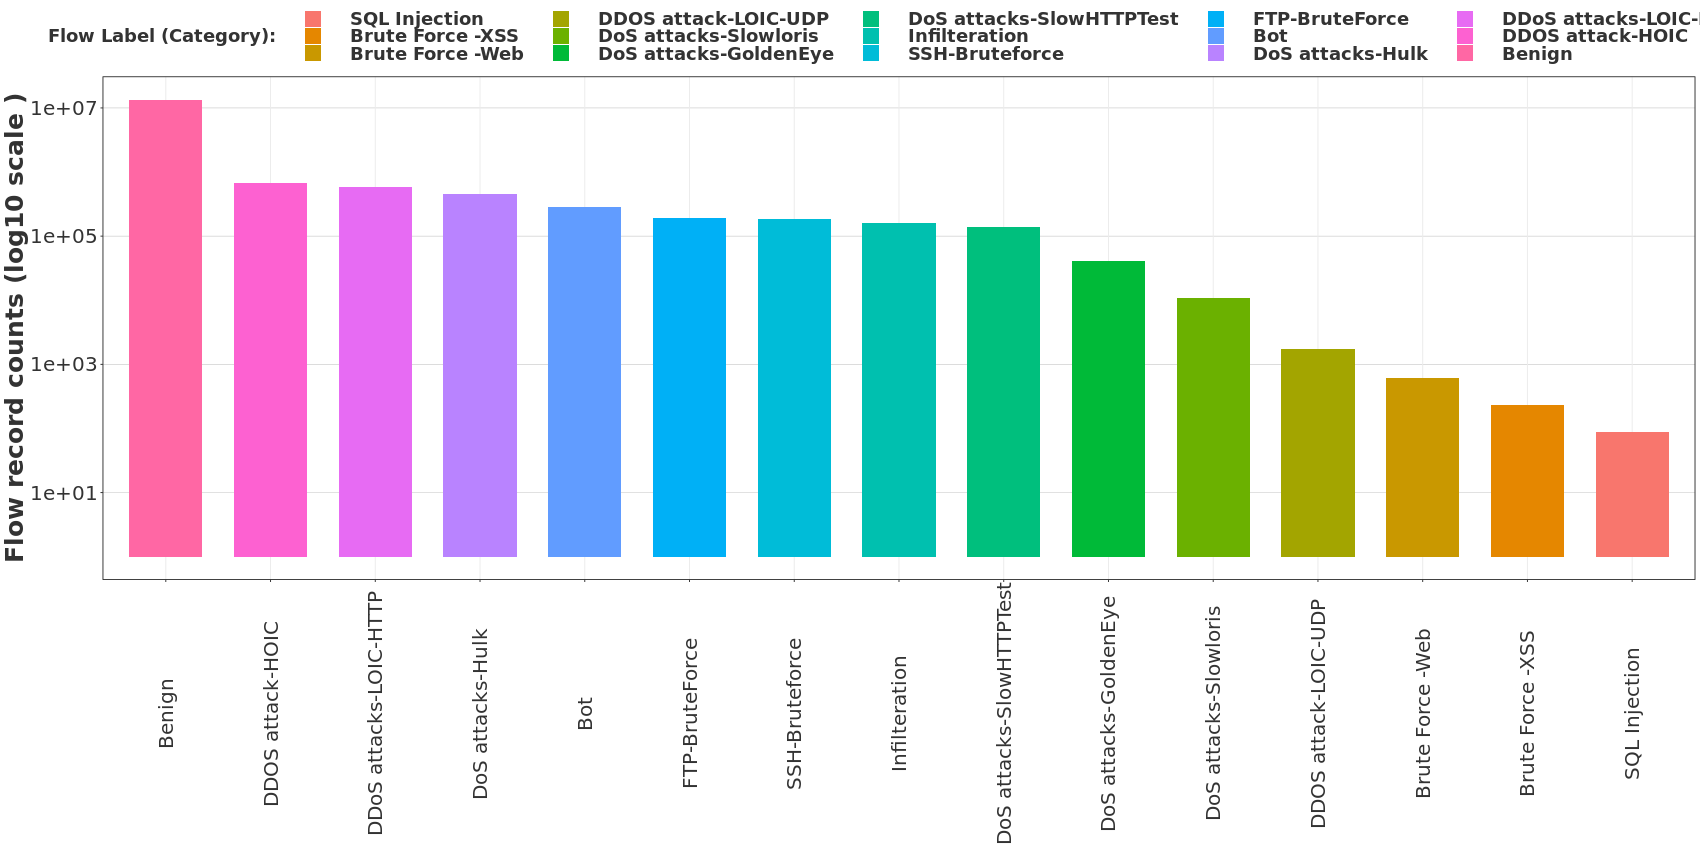

In [48]:
%%R -i df -w 60 -h 30 -u cm -i outfile

p <- ggplot(df,aes(fill=reorder(categories,counts),y=counts,x=reorder(categories,-counts)))+
    geom_bar(position="dodge", stat="identity", width=0.7)+
    labs(
            y='Flow record counts (log10 scale )'
        ) + 
    scale_y_log10()+
       theme_pubr()+
        THEME_DEFAULT+
        theme(
            legend.title =element_text(size=18) ,
            legend.text=element_text(colour="grey20", size=18, angle=0, hjust=.0, face='bold'),
            legend.spacing.x = unit(1.0, 'cm'),
            panel.grid.major.y = element_line(size=0.25, linetype='solid', color='grey'),
            panel.grid.minor.y = element_line(size=0.01, linetype='solid', color='grey'),
            axis.text.x = element_text(size=20, angle=90,margin = margin(r = 10)),
            axis.text.y = element_text(size=20),
            axis.title.y = element_text(size=25),
            axis.title.x = element_blank(),
            strip.text.y = element_text(size=25)
        )+
        coord_cartesian(clip = "off")+
        guides(color=guide_legend(nrow=1,byrow=TRUE))+
        guides(fill=guide_legend(title='Flow Label (Category):', size=30))
print(p)
ggsave(outfile, p, width=60, height=30, units='cm', dpi=500)